## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_dataset_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_dataset_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mice_number = len(mouse_dataset_df['Mouse ID'].unique())
mice_number

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = mouse_dataset_df[mouse_dataset_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice_ID['Mouse ID'].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = mouse_dataset_df.loc[mouse_dataset_df['Mouse ID'] == "g989", :].copy()
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexNames = mouse_dataset_df[mouse_dataset_df['Mouse ID'] == "g989"].index

clean_mouse_dataset_df = mouse_dataset_df.drop(indexNames)

In [8]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = len(clean_mouse_dataset_df['Mouse ID'].unique())
new_mice_number

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
drugs_obj = clean_mouse_dataset_df.groupby('Drug Regimen')

mean = drugs_obj['Tumor Volume (mm3)'].mean()
median = drugs_obj['Tumor Volume (mm3)'].median()
variance = drugs_obj['Tumor Volume (mm3)'].var()
standard_deviation = drugs_obj['Tumor Volume (mm3)'].std()
SEM = drugs_obj['Tumor Volume (mm3)'].sem()

summary_statistics_df = pd.DataFrame({
    "Average Tumor Volume (mm3)": mean,
    "Median Tumor Volume (mm3)": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Standard Deviation": standard_deviation,
    "Tumor Volume SEM": SEM})

summary_statistics_df

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

summary_statistics_df2 = clean_mouse_dataset_df.groupby('Drug Regimen', as_index = False).agg({'Tumor Volume (mm3)': ["mean", "median", "var", "std", "sem"]})

#additional formatting to match the above summary_statistics_df, 'Drug Regimen' included as a separate coulmn this time
summary_statistics_df2.columns = summary_statistics_df2.columns.droplevel(level=1)
summary_statistics_df2.columns = ["Drug Regimen", "Average Tumor Volume (mm3)", "Median Tumor Volume (mm3)", "Tumor Volume Variance", "Tumor Volume Standard Deviation", "Tumor Volume SEM"]

summary_statistics_df2

,Drug Regimen,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

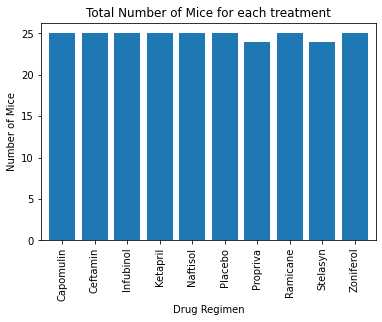

In [95]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
unique_mice_and_drug_df = clean_mouse_dataset_df[['Mouse ID','Drug Regimen']].drop_duplicates()

mice_and_drug_df = unique_mice_and_drug_df.groupby('Drug Regimen').count()

plot1 = mice_and_drug_df.plot(kind="bar", figsize=(6,4), width = 0.8, legend=False)

plot1.set_ylabel("Number of Mice")
plot1.set_title("Total Number of Mice for each treatment")

plt.show()

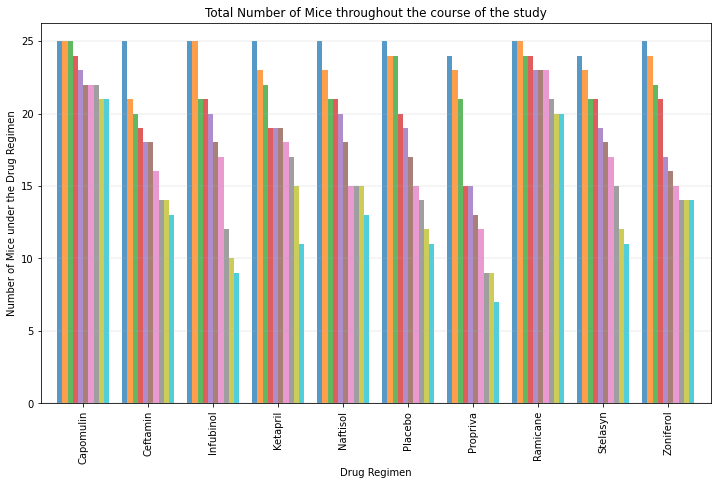

In [152]:
new_mice_and_drug_df = clean_mouse_dataset_df[['Drug Regimen','Timepoint', 'Mouse ID']]

mice_and_drug_df2 = new_mice_and_drug_df.groupby(['Drug Regimen', 'Timepoint']).count()

plot2 = mice_and_drug_df2.unstack(level=1).plot(kind='bar', figsize=(12,7), width = 0.8, alpha=0.75, legend=False)

plot2.set_ylabel("Number of Mice under the Drug Regimen")
plot2.set_title("Total Number of Mice throughout the course of the study")

plot2.yaxis.grid(True, linestyle='-', linewidth=0.25)

plt.show()

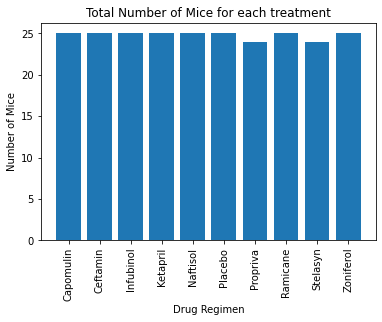

In [98]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mice_and_drug_df.index
y_axis = mice_and_drug_df['Mouse ID']

plt.bar(x_axis, y_axis, align="center")

plt.xticks(x_axis, rotation=90)

plt.title("Total Number of Mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

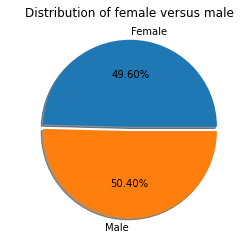

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_mice_and_sex_df = clean_mouse_dataset_df[['Mouse ID','Sex']].drop_duplicates()

mice_and_sex_df = unique_mice_and_sex_df.groupby('Sex').count()

plot3 = mice_and_sex_df.plot(kind="pie", autopct='%1.2f%%', explode=[0.05, 0], y='Mouse ID', title=("Distribution of female versus male"), legend=False, shadow=True)
plot3.set_ylabel(" ")

plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot




## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
